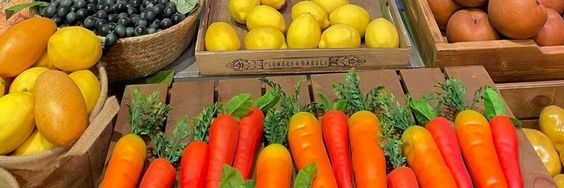

# <center> Predicting Food Insecurity in ASEAN countries </center>

### **Group 8**<br>
**Group member:**<br>
- SUET LING KU (S2133418)
- JENIFER MAYANG JUES (S2016572)
- RADZIAH ZAINUDDIN (S2156690)
- YINGGANG JIE (S2113868)
- RUIXUE ZHANG (S2142119)

## Overview
- Food insecurity (FI) is defined as the state of being without secure access to sufficient quantity of affordable nutritious food that sustains an active and healthy lifestyle. 

- FI could lead the to disruption of food intake or change in eating patterns due to various reasons such as lack of available foods and unaffordable food prices.

- FI can be measured by the prevalence of food insecurity and the prevalence of undernourishment in a population. 
 
- The global food crisis in 2007 shows that food insecurity could lead to hunger crisis, political instability and riots. Therefore, ASEAN countries must implement a robust food security response to ensure all 4 pillars of food security indicators are maintained. 

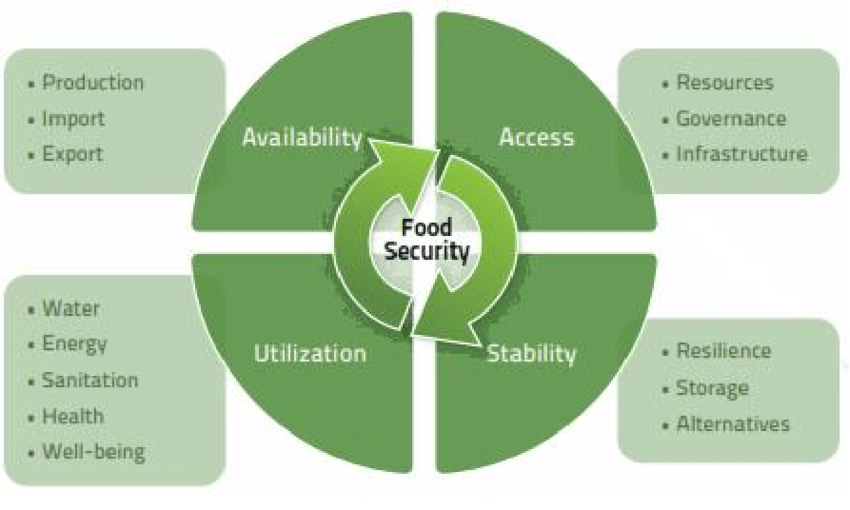

- The datasets we used in this project is obtained from the Food and Agriculture Organization (FAO) website and The World Bank. 

## Initial Questions
- What are the factors that contributes to the food insecurity in ASEAN countries? 
- What countries that are most vulnerable to food insecurity risk? 
- What are the relationship between food insecurity prevalence and other factors such as population size, food production and food prices?  
- How can we predict prevalence of food insecurity (%) and prevalence of undernourishment (%) for each ASEAN country? 

## Motivation
 
- To establish an early warning system to inform policy makers. 
- To provide insights for objective decision-making for governments to supply adequate and nutritious food for the affected populations.
- To strengthen food security system in the ASEAN region. 

## Problem Statement

- Household surveys are mainly used to measure food security dimensions which require substantial manpower, time and budget


## Data Mining Goal

- To develop a model to predict the food insecurity in ASEAN countries.
- To predict the food insecurity in ASEAN countries using various regression models. 


## Related work

According to International Strategy Institute (ISI), food crisis may hit Malaysia due to the COVID-19 pandemic because a lot of countries have imposed lockdown and this has impacted the import and export activities. Malaysia depends a lot on commodity imports such as from Australia, India, Vietnam and Thailand.
Reference link: https://www.thesundaily.my/local/food-crisis-may-hit-malaysia-says-isi-IN2395219

With the restrictions and border closure in all countries during the pandemic has disrupted local food supply chain and increased shipping costs. This has directly impacted the increasing of food price. Other external factors such as climate change, catastrophies, pest infestations and spread of infectious diseases. A rising of food inflation also has been observed between 2019 to 2020. Additionally, the pandemic has caused tremendous surge in unemployment rate which reduced total work hours and significantly decreased a total of household income. With the relation of high food price and low income, the access to healthy and nourishing food are affected and in turn affects prevalence of undernourishment.
Reference link: https://www.adb.org/news/features/food-inflation-food-nutrition-security-situation-developing-asia-covid-19-pandemic

Malaysia is going to be affected by the inflation post pandemic and it has been recorded by Malaysia Department of Statistics in which inflation rate in this country has increased 3.2% in December 2021 due to increasing price of food and fuels.
Reference link: https://www.cnbc.com/2022/01/28/malaysia-is-taking-steps-to-control-rising-food-prices-says-minister.html




## Data Cleaning / Preprocessing


## Part 1: Reshape and merge datasets

In this part, we will tidy the form of three raw datasets, and finally merge them into one dataset.

### 1.1  Reshape Food Security Indicators dataset

***Import libraries and read dataset***

In [15]:
import numpy as np
import pandas as pd
df1=pd.read_csv('ASEAN Food Security Indicators.csv')
df1.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,26,Brunei Darussalam,6121,Value,21010,Average dietary energy supply adequacy (percen...,20002002,2000-2002,%,123,F,FAO estimate,NaN
1,FS,Suite of Food Security Indicators,26,Brunei Darussalam,6121,Value,21010,Average dietary energy supply adequacy (percen...,20012003,2001-2003,%,125,F,FAO estimate,NaN
2,FS,Suite of Food Security Indicators,26,Brunei Darussalam,6121,Value,21010,Average dietary energy supply adequacy (percen...,20022004,2002-2004,%,127,F,FAO estimate,NaN
3,FS,Suite of Food Security Indicators,26,Brunei Darussalam,6121,Value,21010,Average dietary energy supply adequacy (percen...,20032005,2003-2005,%,127,F,FAO estimate,NaN
4,FS,Suite of Food Security Indicators,26,Brunei Darussalam,6121,Value,21010,Average dietary energy supply adequacy (percen...,20042006,2004-2006,%,127,F,FAO estimate,NaN


***Drop useless or duplicated columns***

In [16]:
df1=df1.drop(['Domain Code', 'Domain','Area Code (FAO)', 'Year Code','Element Code','Element',
            'Item Code','Unit', 'Flag',
              'Flag Description','Note'], axis=1)
df1.head()

,Area,Item,Year,Value
0,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2000-2002,123
1,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2001-2003,125
2,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2002-2004,127
3,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2003-2005,127
4,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2004-2006,127


***Formatting columns***

In [17]:
# Formatting 'Year' column
for i in range(len(df1)):
    if len(df1.iloc[i,2])==9:
        df1.iloc[i,2]=int((int(df1.iloc[i,2][0:4])+int(df1.iloc[i,2][5:]))/2)
    elif len(df1.iloc[i,2])==4:
        df1.iloc[i,2]=int(df1.iloc[i,2])
    else:
        print('There is an error in Year column')
# Formatting 'Value' column
df1.fillna(0,inplace=True)
df1['Value'] = df1.Value.apply(str)
index = df1[df1['Value'].str.contains('<'or'>')].index
for i in index:
    df1.iloc[i,3] = df1.iloc[i,3][1:]
    pass
df1['Value'] = pd.to_numeric(df1['Value'], downcast='float')
for i in range(np.shape(df1)[0]):
    for j in range(np.shape(df1)[1]):
        if df1.iloc[i,j] == 0:
            df1.iloc[i,j] = float('NaN')
df1.head()

,Area,Item,Year,Value
0,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2001,123.0
1,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2002,125.0
2,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2003,127.0
3,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2004,127.0
4,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2005,127.0


***Reshape dataframe organized by Item***

In [18]:
from pandas import pivot
df1=df1.pivot_table(index=['Area','Year'],columns='Item',values='Value')
df1=df1.reset_index()
df1.head()

Item,Area,Year,Average dietary energy requirement (kcal/cap/day),Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Average value of food production (constant 2004-2006 I$/cap) (3-year average),Cereal import dependency ratio (percent) (3-year average),Coefficient of variation of habitual caloric consumption distribution (real number),...,Prevalence of anemia among women of reproductive age (15-49 years),Prevalence of exclusive breastfeeding among infants 0-5 months of age,Prevalence of low birthweight (percent),Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average),Prevalence of obesity in the adult population (18 years and older),Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Rail lines density (total route in km per 100 square km of land area),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average)
0,Brunei Darussalam,2000,2323.0,NaN,NaN,NaN,NaN,NaN,NaN,0.21,...,17.100000,NaN,10.3,NaN,7.2,NaN,NaN,NaN,NaN,NaN
1,Brunei Darussalam,2001,2329.0,123.0,75.699997,87.400002,45.400002,81.0,100.000000,0.21,...,16.600000,NaN,9.5,NaN,7.5,NaN,2.6,NaN,50.0,5.0
2,Brunei Darussalam,2002,2337.0,125.0,78.699997,89.699997,47.700001,85.0,99.599998,0.21,...,16.299999,NaN,9.2,NaN,7.9,NaN,2.5,NaN,48.0,4.0
3,Brunei Darussalam,2003,2345.0,127.0,81.699997,90.300003,48.299999,86.0,95.699997,0.21,...,16.000000,NaN,9.1,NaN,8.2,NaN,2.5,NaN,47.0,4.0
4,Brunei Darussalam,2004,2352.0,127.0,81.000000,88.599998,47.299999,76.0,93.800003,0.21,...,15.700000,NaN,9.2,NaN,8.6,NaN,2.5,NaN,46.0,4.0


### 1.2 Reshape Consumer Price indices dataset

***Read dataset***

In [19]:
df2=pd.read_csv('ASEAN Consumer Price Indices.csv')
df2.head()

,Domain Code,Domain,Area Code (M49),Area,Year Code,Year,Item Code,Item,Months Code,Months,Unit,Value,Flag,Flag Description,Note
0,CP,Consumer Price Indices,96,Brunei Darussalam,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,88.959933,F,FAO estimate,base year is 2015
1,CP,Consumer Price Indices,96,Brunei Darussalam,2001,2001,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,89.702503,F,FAO estimate,base year is 2015
2,CP,Consumer Price Indices,96,Brunei Darussalam,2002,2002,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,90.146512,F,FAO estimate,base year is 2015
3,CP,Consumer Price Indices,96,Brunei Darussalam,2003,2003,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,90.365320,F,FAO estimate,base year is 2015
4,CP,Consumer Price Indices,96,Brunei Darussalam,2004,2004,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,89.822766,F,FAO estimate,base year is 2015


***Drop useless or duplicated variables***

In [20]:
df2=df2.drop(['Domain Code', 'Domain','Area Code (M49)', 'Year Code',
            'Item Code','Months Code', 'Flag',
              'Flag Description','Note','Unit'], axis=1)
df2.head()

,Area,Year,Item,Months,Value
0,Brunei Darussalam,2000,"Consumer Prices, Food Indices (2015 = 100)",January,88.959933
1,Brunei Darussalam,2001,"Consumer Prices, Food Indices (2015 = 100)",January,89.702503
2,Brunei Darussalam,2002,"Consumer Prices, Food Indices (2015 = 100)",January,90.146512
3,Brunei Darussalam,2003,"Consumer Prices, Food Indices (2015 = 100)",January,90.365320
4,Brunei Darussalam,2004,"Consumer Prices, Food Indices (2015 = 100)",January,89.822766


In [21]:
# split 'Months' column into separate columns
from pandas import pivot
df2=df2.pivot_table(index=['Area','Year','Item'],columns='Months',values='Value')
df2=df2.reset_index()
df2.head()

Months,Area,Year,Item,April,August,December,February,January,July,June,March,May,November,October,September
0,Brunei Darussalam,2000,"Consumer Prices, Food Indices (2015 = 100)",89.152073,89.408259,89.664445,89.023980,88.959933,89.344212,89.280166,89.088026,89.216119,89.600398,89.536352,89.472305
1,Brunei Darussalam,2000,"Consumer Prices, General Indices (2015 = 100)",94.856250,95.560047,95.560047,94.465251,94.230652,95.325448,95.247248,94.778050,94.856250,95.403648,95.794646,95.638247
2,Brunei Darussalam,2001,"Consumer Prices, Food Indices (2015 = 100)",89.816677,89.968908,90.121140,89.740561,89.702503,89.930850,89.892793,89.778619,89.854735,90.083082,90.045024,90.006966
3,Brunei Darussalam,2001,"Consumer Prices, General Indices (2015 = 100)",96.185645,96.263845,92.588458,95.951046,95.872846,96.263845,96.263845,96.029246,96.185645,94.074253,96.420244,96.420244
4,Brunei Darussalam,2001,Food price inflation,0.745472,0.627067,0.509338,0.804931,0.834724,0.656604,0.686185,0.775180,0.715807,0.538707,0.568118,0.597571


In [22]:
# impute na using mean method
df2_1=df2.iloc[:,3:15]
a1=np.where(np.isnan(df2_1))[0]
a2=np.where(np.isnan(df2_1))[1]
for i in a1:
    for j in a2:
        df2_1.iloc[i,j]=df2_1.iloc[i].mean()

In [23]:
# add new column by mean value of months
df2['Value']=df2_1.apply(lambda x: x.mean(),axis=1)

In [24]:
# drop months columns
df2=df2.drop(['January','February','March','April','May','June','July','August','September','October','November','December'], axis=1)
df2.head()

Months,Area,Year,Item,Value
0,Brunei Darussalam,2000,"Consumer Prices, Food Indices (2015 = 100)",89.312189
1,Brunei Darussalam,2000,"Consumer Prices, General Indices (2015 = 100)",95.142982
2,Brunei Darussalam,2001,"Consumer Prices, Food Indices (2015 = 100)",89.911821
3,Brunei Darussalam,2001,"Consumer Prices, General Indices (2015 = 100)",95.709930
4,Brunei Darussalam,2001,Food price inflation,0.671642


***Reshape dataframe organized by Item***

In [25]:
# split the 'Item' column into Food Indices, General Indices, and inflation rates
df2=df2.pivot_table(index=['Area','Year'],columns='Item',values='Value')
df2=df2.reset_index()
df2.head()

Item,Area,Year,"Consumer Prices, Food Indices (2015 = 100)","Consumer Prices, General Indices (2015 = 100)",Food price inflation
0,Brunei Darussalam,2000,89.312189,95.142982,NaN
1,Brunei Darussalam,2001,89.911821,95.709930,0.671642
2,Brunei Darussalam,2002,90.286058,93.494272,0.416298
3,Brunei Darussalam,2003,90.033759,93.743590,-0.279126
4,Brunei Darussalam,2004,90.485887,94.530500,0.503782


### 1.3 Select needed data from World Population dataset

***Read dataset***

In [26]:
url = 'https://raw.githubusercontent.com/Ruixue-Zhang/Data-Analytics-group-assignment/main/cleaning/Consumer%20Price%20indices%26Food%20Security%20Indicators/raw%20data/World%20Population%20-%20World%20Bank.csv'
df3 = pd.read_csv(url, skiprows=[0,1,2,3])
df3.head()  

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN,NaN


***Drop columns***

In [27]:
df3 = df3.drop(['Country Code', 'Indicator Name', 'Indicator Code','2021','Unnamed: 66'], axis = 1)
df3.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,161156430.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,114781116.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,5771973.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


***Select year 2000 - 2020***

In [28]:
year = np.arange(2000,2021)
col = ['Country Name']
for i in year:
    col.append(str(i))
df3 = df3[col]
df3.head()

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,90866.0,92892.0,94992.0,97016.0,98744.0,100028.0,100830.0,101226.0,101362.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,398113044.0,408522129.0,419223717.0,430246635.0,441630149.0,453404076.0,465581372.0,478166911.0,491173160.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,20779957.0,21606992.0,22600774.0,23680871.0,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,267214544.0,274433894.0,281842480.0,289469530.0,297353098.0,305520588.0,313985474.0,322741656.0,331772330.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,16395477.0,16945753.0,17519418.0,18121477.0,18758138.0,19433604.0,20149905.0,20905360.0,21695636.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


***Transpose dataset***

In [29]:
df3 = df3.set_index('Country Name').transpose()
df3 = df3.rename_axis('Year').reset_index()
df3.head()

Country Name,Year,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,2000,90866.0,398113044.0,20779957.0,267214544.0,16395477.0,3089027.0,65390.0,282344141.0,3134067.0,...,108642.0,79910411.0,184964.0,6.114324e+09,174454.0,1700000.0,17409071.0,44967713.0,10415942.0,11881482.0
1,2001,92892.0,408522129.0,21606992.0,274433894.0,16945753.0,3060173.0,67344.0,288432153.0,3302722.0,...,108549.0,80742500.0,189209.0,6.193664e+09,175394.0,1701154.0,17918369.0,45571272.0,10692197.0,11923906.0
2,2002,94992.0,419223717.0,22600774.0,281842480.0,17519418.0,3051010.0,70048.0,294665202.0,3478769.0,...,108509.0,81534406.0,193927.0,6.272724e+09,176410.0,1702310.0,18443684.0,46150913.0,10971704.0,11954293.0
3,2003,97016.0,430246635.0,23680871.0,289469530.0,18121477.0,3039616.0,73180.0,301113869.0,3711931.0,...,108505.0,82301650.0,198960.0,6.351856e+09,177481.0,1703466.0,18985001.0,46719203.0,11256740.0,11982219.0
4,2004,98744.0,441630149.0,24726689.0,297353098.0,18758138.0,3026939.0,76250.0,307862846.0,4068577.0,...,108466.0,83062819.0,204123.0,6.431527e+09,178597.0,1704622.0,19540096.0,47291610.0,11550641.0,12019911.0


***Select certain country we need***

In [30]:
Area = ['Brunei Darussalam', 'Cambodia', 'Indonesia',
       'Lao PDR', 'Malaysia', 'Myanmar',
       'Philippines', 'Singapore', 'Thailand', 'Vietnam']
col=['Year']
for i in Area:
    col.append(i)
df3 = df3[col]

***Rename Areas for consistency***

In [31]:
df3.rename(columns = {'Lao PDR':"Lao People's Democratic Republic", 'Vietnam':'Viet Nam'}, inplace = True)
df3.head()

Country Name,Year,Brunei Darussalam,Cambodia,Indonesia,Lao People's Democratic Republic,Malaysia,Myanmar,Philippines,Singapore,Thailand,Viet Nam
0,2000,333166.0,12155241.0,211513822.0,5323701.0,23194252.0,46719698.0,77991757.0,4027887.0,62952639.0,79910411.0
1,2001,340037.0,12405411.0,214427419.0,5409584.0,23709115.0,47225119.0,79672869.0,4138012.0,63539190.0,80742500.0
2,2002,346777.0,12637719.0,217357790.0,5493247.0,24208391.0,47702163.0,81365260.0,4175950.0,64069093.0,81534406.0
3,2003,353295.0,12856171.0,220309473.0,5576640.0,24698821.0,48148907.0,83051970.0,4114826.0,64549867.0,82301650.0
4,2004,359434.0,13066475.0,223285666.0,5662199.0,25190647.0,48564489.0,84710544.0,4166664.0,64995303.0,83062819.0


***Reshape dataframe***

In [32]:
df3 = pd.melt(df3, id_vars = ('Year'), value_vars = list(df3.columns[1:]),
         var_name = 'Area', value_name = 'Population_total')
df3['Year'] = df3['Year'].astype(int)
df3.head()

,Year,Area,Population_total
0,2000,Brunei Darussalam,333166.0
1,2001,Brunei Darussalam,340037.0
2,2002,Brunei Darussalam,346777.0
3,2003,Brunei Darussalam,353295.0
4,2004,Brunei Darussalam,359434.0


### 1.4 Combine three datasets

In [33]:
# combine 3 dataframes
data = pd.concat((df.set_index(['Area','Year']) for df in [df1, df2, df3]),axis=1, join='inner').reset_index()
data.head()


,Area,Year,Average dietary energy requirement (kcal/cap/day),Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Average value of food production (constant 2004-2006 I$/cap) (3-year average),Cereal import dependency ratio (percent) (3-year average),Coefficient of variation of habitual caloric consumption distribution (real number),...,Prevalence of obesity in the adult population (18 years and older),Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Rail lines density (total route in km per 100 square km of land area),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average),"Consumer Prices, Food Indices (2015 = 100)","Consumer Prices, General Indices (2015 = 100)",Food price inflation,Population_total
0,Brunei Darussalam,2000,2323.0,NaN,NaN,NaN,NaN,NaN,NaN,0.21,...,7.2,NaN,NaN,NaN,NaN,NaN,89.312189,95.142982,NaN,333166.0
1,Brunei Darussalam,2001,2329.0,123.0,75.699997,87.400002,45.400002,81.0,100.000000,0.21,...,7.5,NaN,2.6,NaN,50.0,5.0,89.911821,95.709930,0.671642,340037.0
2,Brunei Darussalam,2002,2337.0,125.0,78.699997,89.699997,47.700001,85.0,99.599998,0.21,...,7.9,NaN,2.5,NaN,48.0,4.0,90.286058,93.494272,0.416298,346777.0
3,Brunei Darussalam,2003,2345.0,127.0,81.699997,90.300003,48.299999,86.0,95.699997,0.21,...,8.2,NaN,2.5,NaN,47.0,4.0,90.033759,93.743590,-0.279126,353295.0
4,Brunei Darussalam,2004,2352.0,127.0,81.000000,88.599998,47.299999,76.0,93.800003,0.21,...,8.6,NaN,2.5,NaN,46.0,4.0,90.485887,94.530500,0.503782,359434.0


***Save data***

In [34]:
data.to_csv(r'ASEAN_Consumer Price&Food Security Indicators-merged.csv',index=False)

## Part 2: Handle missing data

In this part, we use Random Forest Regressor model combined mean method to impute missing values.

### 2.1 Initial understanding of the dataset

***Import libraries and read dataset***

In [95]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
df=pd.read_csv('ASEAN_Consumer Price&Food Security Indicators-merged.csv')
df.head()

,Area,Year,Average dietary energy requirement (kcal/cap/day),Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Average value of food production (constant 2004-2006 I$/cap) (3-year average),Cereal import dependency ratio (percent) (3-year average),Coefficient of variation of habitual caloric consumption distribution (real number),...,Prevalence of obesity in the adult population (18 years and older),Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Rail lines density (total route in km per 100 square km of land area),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average),"Consumer Prices, Food Indices (2015 = 100)","Consumer Prices, General Indices (2015 = 100)",Food price inflation,Population_total
0,Brunei Darussalam,2000,2323.0,NaN,NaN,NaN,NaN,NaN,NaN,0.21,...,7.2,NaN,NaN,NaN,NaN,NaN,89.312189,95.142982,NaN,333166.0
1,Brunei Darussalam,2001,2329.0,123.0,75.7,87.4,45.4,81.0,100.0,0.21,...,7.5,NaN,2.6,NaN,50.0,5.0,89.911821,95.709930,0.671642,340037.0
2,Brunei Darussalam,2002,2337.0,125.0,78.7,89.7,47.7,85.0,99.6,0.21,...,7.9,NaN,2.5,NaN,48.0,4.0,90.286058,93.494272,0.416298,346777.0
3,Brunei Darussalam,2003,2345.0,127.0,81.7,90.3,48.3,86.0,95.7,0.21,...,8.2,NaN,2.5,NaN,47.0,4.0,90.033759,93.743590,-0.279126,353295.0
4,Brunei Darussalam,2004,2352.0,127.0,81.0,88.6,47.3,76.0,93.8,0.21,...,8.6,NaN,2.5,NaN,46.0,4.0,90.485887,94.530500,0.503782,359434.0


***See the dimension of dataset***

In [89]:
print('The dataset contains', np.shape(df)[0], 'rows and', np.shape(df)[1], 'columns.')

The dataset contains 210 rows and 48 columns.


***See the distribution of missing data***

In [96]:
# Calculate total NAs
df.isnull().sum()

Area                                                                                                                0
Year                                                                                                                0
Average dietary energy requirement (kcal/cap/day)                                                                   0
Average dietary energy supply adequacy (percent) (3-year average)                                                  39
Average fat supply (g/cap/day) (3-year average)                                                                    60
Average protein supply (g/cap/day) (3-year average)                                                                60
Average supply of protein of animal origin (g/cap/day) (3-year average)                                            60
Average value of food production (constant 2004-2006 I$/cap) (3-year average)                                      40
Cereal import dependency ratio (percent) (3-year average

<AxesSubplot:>

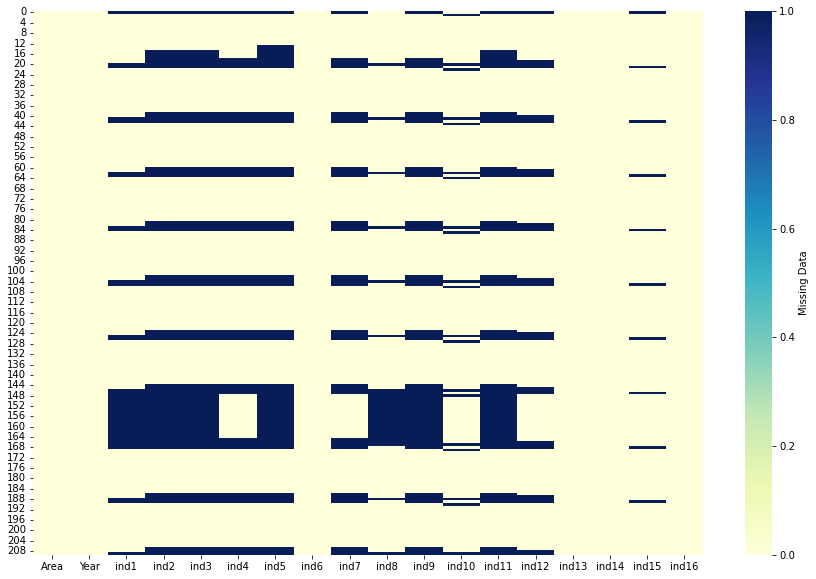

In [25]:
# Visualizing Missing Data using Seaborn heatmap()
plt.figure(figsize=(15,10))
sns.heatmap(df.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

### 2.2 Imputation of missing data

#### Step 1: Test correlation between complete columns and incomplete columns

***Convert string variables into categorical numeric variables***

In [97]:
# create a categorical numeric variable to result 'Area' into groups
df['Area_cat'] = df['Area'].astype('category')
df['Area_cat'] = df['Area_cat'].cat.codes
# reindex dataset
df = df.reindex(columns = df.columns)
# create df1 with no str variables to test correlation
df1 = df.drop('Area', axis = 1)

#### Step 2: Create and test model

We create a model to impute NAs base on *Seaborn Random Forest Regressor*, using *Mean Square Error* to test model.

***Some introduction of the model:***

     X_train - This includes all independent variables, will be used to train the model.
     
     X_test - The remaining portion of the independent variables from the data which will not be used in the training phase and will be used to make predictions to test the accuracy of the model.
     
     y_train - This is dependent variable which needs to be predicted by this model, including category labels against your independent variables, we need to specify our dependent variable while training/fitting the model.
     
     y_test - This data has category labels for the test data, these labels will be used to test the accuracy between actual and predicted categories.
     
     R squared - is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.—Wiki
     We accept 0.75 as a high r2 score in our project.

In [98]:
# This function is used to test model by R squared score.
def test_model(df):
    import warnings
    warnings.filterwarnings('ignore')     # ignore warning message
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import KFold
    kf = KFold(n_splits = 10, random_state = 42, shuffle = True)    
    incomplete_col = df.loc[:,df.isnull().sum() != 0].columns
    high_r2_score=[]
    low_r2_score=[]
    
    for i in incomplete_col:
        df_missing = df[df[i].isnull()].copy()
        df_filter = df.merge(df_missing,how='outer',indicator=True).query('_merge == "left_only"').drop('_merge',1).copy()
        y_pred_rf = []
        y_true_rf = []
        features = df.loc[:,df.isnull().sum() == 0].columns
        for train_index,test_index in kf.split(df_filter):
            df_test = df_filter.iloc[test_index]
            df_train = df_filter.iloc[train_index]
            X_train = np.array(df_train[features])     
            y_train = np.array(df_train[i])            
            X_test = np.array(df_test[features])     
            y_test = np.array(df_test[i])        
            model = RandomForestRegressor(n_estimators = 100, max_depth = 10, random_state = 42)
            model.fit(X_train,y_train)     
            y_pred_rf.append(model.predict(X_test)[0])
            y_true_rf.append(y_test[0])
        if r2_score(y_true_rf, y_pred_rf, sample_weight=None, multioutput='uniform_average') > 0.75:
            high_r2_score.append(i)
        else:
            low_r2_score.append(i)
    return high_r2_score,low_r2_score
high_r2_score = test_model(df1)[0]
low_r2_score = test_model(df1)[1]

In [99]:
print('These are vars with high R squared score:')
for i in high_r2_score:
    print(i)

These are vars with high R squared score:
Average dietary energy supply adequacy (percent) (3-year average)
Average fat supply (g/cap/day) (3-year average)
Average protein supply (g/cap/day) (3-year average)
Average supply of protein of animal origin (g/cap/day) (3-year average)
Cereal import dependency ratio (percent) (3-year average)
Coefficient of variation of habitual caloric consumption distribution (real number)
Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average)
Number of children under 5 years affected by wasting (million)
Number of moderately or severely food insecure people (million) (3-year average)
Number of newborns with low birthweight (million)
Number of obese adults (18 years and older) (million)
Number of people undernourished (million) (3-year average)
Number of women of reproductive age (15-49 years) affected by anemia (million)
Per capita food production variability (constant 2004-2006 thousand int$ per capi

In [100]:
print('These are vars with low R squared score:')
for i in low_r2_score:
    print(i)

These are vars with low R squared score:
Average value of food production (constant 2004-2006 I$/cap) (3-year average)
Incidence of caloric losses at retail distribution level (percent)
Number of severely food insecure people (million) (3-year average)
Per capita food supply variability (kcal/cap/day)
Percentage of children under 5 years affected by wasting (percent)
Prevalence of exclusive breastfeeding among infants 0-5 months of age
Rail lines density (total route in km per 100 square km of land area)
Food price inflation


As shown above, the model performs good for most incomplete variables, while for others it has a low r2 score. For vars with low r2 score, I plan to use mean by Area to impute the NaNs for those have small missing values, and delete the vars which have large missing part.

#### Step 3: Deal with variables which have a low R squared score

***Drop vars which has large missing part***

In [101]:
df2 = df1.copy()
var_to_drop = []
for i in low_r2_score:
    if df2[i].isnull().sum() > 60:
        var_to_drop.append(i)
print('dropped vars:',var_to_drop)
for var in var_to_drop:
    df2.__delitem__(var)

dropped vars: ['Number of severely food insecure people (million) (3-year average)', 'Percentage of children under 5 years affected by wasting (percent)', 'Prevalence of exclusive breastfeeding among infants 0-5 months of age', 'Rail lines density (total route in km per 100 square km of land area)']


***Impute NAs by Area mean for other vars***

In [102]:
var_impute_mean = list(set(low_r2_score) - set(var_to_drop))
for var in var_impute_mean:
    df2[var].fillna(df2.groupby('Area_cat')[var].transform('mean'))

#### Step 4: Impute NaNs using Random Forest Regressor model (for vars with high R squared score)

In [103]:
def Impute_NA(df):
    import warnings
    warnings.filterwarnings('ignore')
    from sklearn.ensemble import RandomForestRegressor
    incomplete_col = df.loc[:,df.isnull().sum() != 0].columns
    for i in incomplete_col:
        df_missing = df[df[i].isnull()].copy()
        df_filter = df.merge(df_missing,how='outer',indicator=True).query('_merge == "left_only"').drop('_merge',1).copy()
        features = features = df.loc[:,df.isnull().sum() == 0].columns
        X_test = np.array(df_missing[features])
        X_train = np.array(df_filter[features])
        y_train = np.array(df_filter[i])
        model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)   #set model attribute
        model.fit(X_train,y_train)            # fit model according to complete train set
        y_test = model.predict(X_test)      # predict NAs
        df.loc[df[i].isnull(),i] = y_test      # impute NAs
    return df
Impute_NA(df2)

,Year,Average dietary energy requirement (kcal/cap/day),Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Average value of food production (constant 2004-2006 I$/cap) (3-year average),Cereal import dependency ratio (percent) (3-year average),Coefficient of variation of habitual caloric consumption distribution (real number),Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average),...,Prevalence of obesity in the adult population (18 years and older),Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average),"Consumer Prices, Food Indices (2015 = 100)","Consumer Prices, General Indices (2015 = 100)",Food price inflation,Population_total,Area_cat
0,2000,2323.0,123.667500,79.343000,87.412667,45.905,84.90,96.556,0.21,2902.850000,...,7.200000,2.839,2.567000,44.10,4.14,89.312189,95.142982,0.760666,333166.0,0
1,2001,2329.0,123.000000,75.700000,87.400000,45.400,81.00,100.000,0.21,2859.000000,...,7.500000,2.006,2.600000,50.00,5.00,89.911821,95.709930,0.671642,340037.0,0
2,2002,2337.0,125.000000,78.700000,89.700000,47.700,85.00,99.600,0.21,2923.000000,...,7.900000,2.086,2.500000,48.00,4.00,90.286058,93.494272,0.416298,346777.0,0
3,2003,2345.0,127.000000,81.700000,90.300000,48.300,86.00,95.700,0.21,2971.000000,...,8.200000,2.714,2.500000,47.00,4.00,90.033759,93.743590,-0.279126,353295.0,0
4,2004,2352.0,127.000000,81.000000,88.600000,47.300,76.00,93.800,0.21,2996.000000,...,8.600000,2.730,2.500000,46.00,4.00,90.485887,94.530500,0.503782,359434.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2016,2302.0,125.000000,80.400000,94.300000,37.300,201.00,4.900,0.28,2864.000000,...,2.100000,1.369,7.800000,54.00,6.00,102.363624,102.668808,2.363180,93640435.0,9
206,2017,2299.0,126.000000,83.400000,96.000000,37.700,99.00,8.300,0.28,2892.000000,...,4.875367,0.500,7.200000,53.00,6.00,101.258549,106.283014,-1.072609,94600643.0,9
207,2018,2297.0,127.000000,80.893333,94.083000,38.277,135.96,-1.050,0.28,2915.000000,...,4.992833,0.500,6.800000,52.46,5.00,104.536628,110.045037,3.254676,95545959.0,9
208,2019,2295.0,127.000000,80.985333,94.083000,39.028,131.60,-1.105,0.28,2921.000000,...,5.271033,0.500,6.700000,52.33,5.54,108.797175,113.121703,4.078947,96462108.0,9


***Count NaNs after imputation***

In [104]:
df2.isnull().sum().sum()

0

***Add 'Area' column back to cleaned dataset***

In [105]:
df_Area = pd.DataFrame(df.iloc[:,0])
df_cleaned = df_Area.join(df2)
df_cleaned.head()

,Area,Year,Average dietary energy requirement (kcal/cap/day),Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Average value of food production (constant 2004-2006 I$/cap) (3-year average),Cereal import dependency ratio (percent) (3-year average),Coefficient of variation of habitual caloric consumption distribution (real number),...,Prevalence of obesity in the adult population (18 years and older),Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average),"Consumer Prices, Food Indices (2015 = 100)","Consumer Prices, General Indices (2015 = 100)",Food price inflation,Population_total,Area_cat
0,Brunei Darussalam,2000,2323.0,123.6675,79.343,87.412667,45.905,84.9,96.556,0.21,...,7.2,2.839,2.567,44.1,4.14,89.312189,95.142982,0.760666,333166.0,0
1,Brunei Darussalam,2001,2329.0,123.0000,75.700,87.400000,45.400,81.0,100.000,0.21,...,7.5,2.006,2.600,50.0,5.00,89.911821,95.709930,0.671642,340037.0,0
2,Brunei Darussalam,2002,2337.0,125.0000,78.700,89.700000,47.700,85.0,99.600,0.21,...,7.9,2.086,2.500,48.0,4.00,90.286058,93.494272,0.416298,346777.0,0
3,Brunei Darussalam,2003,2345.0,127.0000,81.700,90.300000,48.300,86.0,95.700,0.21,...,8.2,2.714,2.500,47.0,4.00,90.033759,93.743590,-0.279126,353295.0,0
4,Brunei Darussalam,2004,2352.0,127.0000,81.000,88.600000,47.300,76.0,93.800,0.21,...,8.6,2.730,2.500,46.0,4.00,90.485887,94.530500,0.503782,359434.0,0


#### Save data

In [106]:
df_cleaned.to_csv(r'ASEAN_Consumer Price&Food Security Indicators-cleaned.csv',index=False)

## Feature Selection - with Lasso Regression


In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split

In [278]:
df = pd.read_csv('ASEAN_Consumer Price&Food Security Indicators-cleaned.csv')
#url='https://raw.githubusercontent.com/Ruixue-Zhang/Data-Analytics-group-assignment/main/cleaning/ASEAN_Consumer%20Price%26Food%20Security%20Indicators-cleaned.csv'
#df = pd.read_csv(url)
df.head()

,Area,Year,Average dietary energy requirement (kcal/cap/day),Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Average value of food production (constant 2004-2006 I$/cap) (3-year average),Cereal import dependency ratio (percent) (3-year average),Coefficient of variation of habitual caloric consumption distribution (real number),...,Prevalence of obesity in the adult population (18 years and older),Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average),"Consumer Prices, Food Indices (2015 = 100)","Consumer Prices, General Indices (2015 = 100)",Food price inflation,Population_total,Area_cat
0,Brunei Darussalam,2000,2323.0,123.6675,79.343,87.412667,45.905,84.9,96.556,0.21,...,7.2,2.839,2.567,44.1,4.14,89.312189,95.142982,0.760666,333166.0,0
1,Brunei Darussalam,2001,2329.0,123.0000,75.700,87.400000,45.400,81.0,100.000,0.21,...,7.5,2.006,2.600,50.0,5.00,89.911821,95.709930,0.671642,340037.0,0
2,Brunei Darussalam,2002,2337.0,125.0000,78.700,89.700000,47.700,85.0,99.600,0.21,...,7.9,2.086,2.500,48.0,4.00,90.286058,93.494272,0.416298,346777.0,0
3,Brunei Darussalam,2003,2345.0,127.0000,81.700,90.300000,48.300,86.0,95.700,0.21,...,8.2,2.714,2.500,47.0,4.00,90.033759,93.743590,-0.279126,353295.0,0
4,Brunei Darussalam,2004,2352.0,127.0000,81.000,88.600000,47.300,76.0,93.800,0.21,...,8.6,2.730,2.500,46.0,4.00,90.485887,94.530500,0.503782,359434.0,0


In [279]:
# Remove duplicated features and indicators which are same with target
X = df.drop(['Number of moderately or severely food insecure people (million) (3-year average)',
             'Prevalence of undernourishment (percent) (3-year average)',
             'Number of people undernourished (million) (3-year average)',
             'Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)',
             'Prevalence of severe food insecurity in the total population (percent) (3-year average)',
             'Number of moderately or severely food insecure people (million) (3-year average)',
             'Average dietary energy requirement (kcal/cap/day)',
             'Number of children under 5 years affected by wasting (million)',
             'Number of children under 5 years of age who are overweight (modeled estimates) (million)',
             'Number of obese adults (18 years and older) (million)',
             'Number of newborns with low birthweight (million)',
             'Area', 'Area_cat'], axis = 1) #independent variable
y = df['Prevalence of severe food insecurity in the total population (percent) (3-year average)'] #dependent variable 

X.shape, y.shape

((210, 33), (210,))

In [280]:
features = X

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [282]:
pipeline = Pipeline ([
    ('scaler', StandardScaler()),
    ('model', Lasso())
])

In [283]:
search = GridSearchCV(pipeline,
                     {'model__alpha':np.arange(0.1,3,0.1)},
                     cv = 10, 
                     scoring = 'neg_mean_squared_error',
                     verbose = 3)

In [284]:
search.fit(X_train, y_train)

Fitting 10 folds for each of 29 candidates, totalling 290 fits
[CV 1/10] END ................model__alpha=0.1;, score=-1.108 total time=   0.0s
[CV 2/10] END ................model__alpha=0.1;, score=-2.558 total time=   0.0s
[CV 3/10] END ................model__alpha=0.1;, score=-2.489 total time=   0.0s
[CV 4/10] END ................model__alpha=0.1;, score=-0.559 total time=   0.0s
[CV 5/10] END ................model__alpha=0.1;, score=-1.579 total time=   0.0s
[CV 6/10] END ................model__alpha=0.1;, score=-1.123 total time=   0.0s
[CV 7/10] END ................model__alpha=0.1;, score=-1.086 total time=   0.0s
[CV 8/10] END ................model__alpha=0.1;, score=-0.942 total time=   0.0s
[CV 9/10] END ................model__alpha=0.1;, score=-0.815 total time=   0.0s
[CV 10/10] END ...............model__alpha=0.1;, score=-1.565 total time=   0.0s
[CV 1/10] END ................model__alpha=0.2;, score=-1.838 total time=   0.0s
[CV 2/10] END ................model__alpha=0.2

[CV 8/10] END ................model__alpha=1.1;, score=-2.548 total time=   0.0s
[CV 9/10] END ................model__alpha=1.1;, score=-4.635 total time=   0.0s
[CV 10/10] END ...............model__alpha=1.1;, score=-2.494 total time=   0.0s
[CV 1/10] END .model__alpha=1.2000000000000002;, score=-8.039 total time=   0.0s
[CV 2/10] END .model__alpha=1.2000000000000002;, score=-8.450 total time=   0.0s
[CV 3/10] END model__alpha=1.2000000000000002;, score=-13.041 total time=   0.0s
[CV 4/10] END .model__alpha=1.2000000000000002;, score=-3.361 total time=   0.0s
[CV 5/10] END .model__alpha=1.2000000000000002;, score=-7.025 total time=   0.0s
[CV 6/10] END .model__alpha=1.2000000000000002;, score=-4.489 total time=   0.0s
[CV 7/10] END .model__alpha=1.2000000000000002;, score=-3.823 total time=   0.0s
[CV 8/10] END .model__alpha=1.2000000000000002;, score=-2.928 total time=   0.0s
[CV 9/10] END .model__alpha=1.2000000000000002;, score=-5.239 total time=   0.0s
[CV 10/10] END model__alpha=

[CV 6/10] END ................model__alpha=2.2;, score=-8.551 total time=   0.0s
[CV 7/10] END ................model__alpha=2.2;, score=-5.889 total time=   0.0s
[CV 8/10] END ................model__alpha=2.2;, score=-6.148 total time=   0.0s
[CV 9/10] END ...............model__alpha=2.2;, score=-11.712 total time=   0.0s
[CV 10/10] END ...............model__alpha=2.2;, score=-4.638 total time=   0.0s
[CV 1/10] END model__alpha=2.3000000000000003;, score=-14.837 total time=   0.0s
[CV 2/10] END model__alpha=2.3000000000000003;, score=-11.762 total time=   0.0s
[CV 3/10] END model__alpha=2.3000000000000003;, score=-22.736 total time=   0.0s
[CV 4/10] END .model__alpha=2.3000000000000003;, score=-7.411 total time=   0.0s
[CV 5/10] END model__alpha=2.3000000000000003;, score=-13.980 total time=   0.0s
[CV 6/10] END .model__alpha=2.3000000000000003;, score=-8.993 total time=   0.0s
[CV 7/10] END .model__alpha=2.3000000000000003;, score=-6.051 total time=   0.0s
[CV 8/10] END .model__alpha=

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [285]:
search.best_params_

{'model__alpha': 0.1}

In [286]:
coef = search.best_estimator_[1].coef_

In [287]:
[coef !=0]

[array([False, False, False, False, False,  True,  True, False, False,
        False,  True, False, False, False,  True,  True,  True,  True,
        False,  True,  True,  True, False,  True,  True, False, False,
         True,  True, False,  True, False, False])]

In [288]:
#Selected Features by Lasso Feature Selection 
X.columns[coef != 0]

Index(['Average value of food production (constant 2004-2006 I$/cap) (3-year average)',
       'Cereal import dependency ratio (percent) (3-year average)',
       'Incidence of caloric losses at retail distribution level (percent)',
       'Per capita food production variability (constant 2004-2006 thousand int$ per capita)',
       'Per capita food supply variability (kcal/cap/day)',
       'Percent of arable land equipped for irrigation (percent) (3-year average)',
       'Percentage of children under 5 years of age who are overweight (modelled estimates) (percent)',
       'Percentage of population using at least basic drinking water services (percent)',
       'Percentage of population using at least basic sanitation services (percent)',
       'Percentage of population using safely managed drinking water services (Percent)',
       'Political stability and absence of violence/terrorism (index)',
       'Prevalence of anemia among women of reproductive age (15-49 years)',
       'S

In [289]:
#Features discarded by Lasso Feature Selection
X.columns[coef == 0]

Index(['Year',
       'Average dietary energy supply adequacy (percent) (3-year average)',
       'Average fat supply (g/cap/day) (3-year average)',
       'Average protein supply (g/cap/day) (3-year average)',
       'Average supply of protein of animal origin (g/cap/day) (3-year average)',
       'Coefficient of variation of habitual caloric consumption distribution (real number)',
       'Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average)',
       'Gross domestic product per capita, PPP, dissemination (constant 2011 international $)',
       'Minimum dietary energy requirement  (kcal/cap/day)',
       'Number of children under 5 years of age who are stunted (modeled estimates) (million)',
       'Number of women of reproductive age (15-49 years) affected by anemia (million)',
       'Percentage of children under 5 years of age who are stunted (modelled estimates) (percent)',
       'Percentage of population using safely man

In [69]:
# Selected Independent Variable 
# 'Average dietary energy supply adequacy (percent) (3-year average)',
# 'Cereal import dependency ratio (percent) (3-year average)',
# 'Number of obese adults (18 years and older) (million)',
# 'Prevalence of low birthweight (percent)',
# 'Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)',
# 'Value of food imports in total merchandise exports (percent) (3-year average)',
# 'Rural population'

In [290]:
#selected variable correlation
X = df[['Average value of food production (constant 2004-2006 I$/cap) (3-year average)',
       'Cereal import dependency ratio (percent) (3-year average)',
       'Incidence of caloric losses at retail distribution level (percent)',
       'Per capita food production variability (constant 2004-2006 thousand int$ per capita)',
       'Per capita food supply variability (kcal/cap/day)',
       'Percent of arable land equipped for irrigation (percent) (3-year average)',
       'Percentage of children under 5 years of age who are overweight (modelled estimates) (percent)',
       'Percentage of population using at least basic drinking water services (percent)',
       'Percentage of population using at least basic sanitation services (percent)',
       'Percentage of population using safely managed drinking water services (Percent)',
       'Political stability and absence of violence/terrorism (index)',
       'Prevalence of anemia among women of reproductive age (15-49 years)',
       'Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)',
       'Value of food imports in total merchandise exports (percent) (3-year average)',
       'Consumer Prices, General Indices (2015 = 100)']]#independent variable
y = df['Prevalence of severe food insecurity in the total population (percent) (3-year average)'] #dependent variable 

In [291]:
X.head()

,Average value of food production (constant 2004-2006 I$/cap) (3-year average),Cereal import dependency ratio (percent) (3-year average),Incidence of caloric losses at retail distribution level (percent),Per capita food production variability (constant 2004-2006 thousand int$ per capita),Per capita food supply variability (kcal/cap/day),Percent of arable land equipped for irrigation (percent) (3-year average),Percentage of children under 5 years of age who are overweight (modelled estimates) (percent),Percentage of population using at least basic drinking water services (percent),Percentage of population using at least basic sanitation services (percent),Percentage of population using safely managed drinking water services (Percent),Political stability and absence of violence/terrorism (index),Prevalence of anemia among women of reproductive age (15-49 years),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average),"Consumer Prices, General Indices (2015 = 100)"
0,84.9,96.556,3.13,8.316548,51.0,47.821333,6.2,99.0,97.635,95.841,1.300000,17.1,44.1,4.14,95.142982
1,81.0,100.000,3.29,7.500000,63.0,50.000000,6.4,99.0,96.299,96.015,1.259553,16.6,50.0,5.00,95.709930
2,85.0,99.600,3.16,6.900000,31.0,50.000000,6.6,99.0,97.614,95.844,1.160000,16.3,48.0,4.00,93.494272
3,86.0,95.700,3.17,6.700000,40.0,50.000000,6.8,99.0,97.096,95.845,1.150000,16.0,47.0,4.00,93.743590
4,76.0,93.800,3.22,4.200000,59.0,50.000000,7.0,99.0,97.096,96.033,1.370000,15.7,46.0,4.00,94.530500


## Exploratory Data Analysis

In [292]:
X.head()

,Average value of food production (constant 2004-2006 I$/cap) (3-year average),Cereal import dependency ratio (percent) (3-year average),Incidence of caloric losses at retail distribution level (percent),Per capita food production variability (constant 2004-2006 thousand int$ per capita),Per capita food supply variability (kcal/cap/day),Percent of arable land equipped for irrigation (percent) (3-year average),Percentage of children under 5 years of age who are overweight (modelled estimates) (percent),Percentage of population using at least basic drinking water services (percent),Percentage of population using at least basic sanitation services (percent),Percentage of population using safely managed drinking water services (Percent),Political stability and absence of violence/terrorism (index),Prevalence of anemia among women of reproductive age (15-49 years),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average),"Consumer Prices, General Indices (2015 = 100)"
0,84.9,96.556,3.13,8.316548,51.0,47.821333,6.2,99.0,97.635,95.841,1.300000,17.1,44.1,4.14,95.142982
1,81.0,100.000,3.29,7.500000,63.0,50.000000,6.4,99.0,96.299,96.015,1.259553,16.6,50.0,5.00,95.709930
2,85.0,99.600,3.16,6.900000,31.0,50.000000,6.6,99.0,97.614,95.844,1.160000,16.3,48.0,4.00,93.494272
3,86.0,95.700,3.17,6.700000,40.0,50.000000,6.8,99.0,97.096,95.845,1.150000,16.0,47.0,4.00,93.743590
4,76.0,93.800,3.22,4.200000,59.0,50.000000,7.0,99.0,97.096,96.033,1.370000,15.7,46.0,4.00,94.530500


<AxesSubplot:>

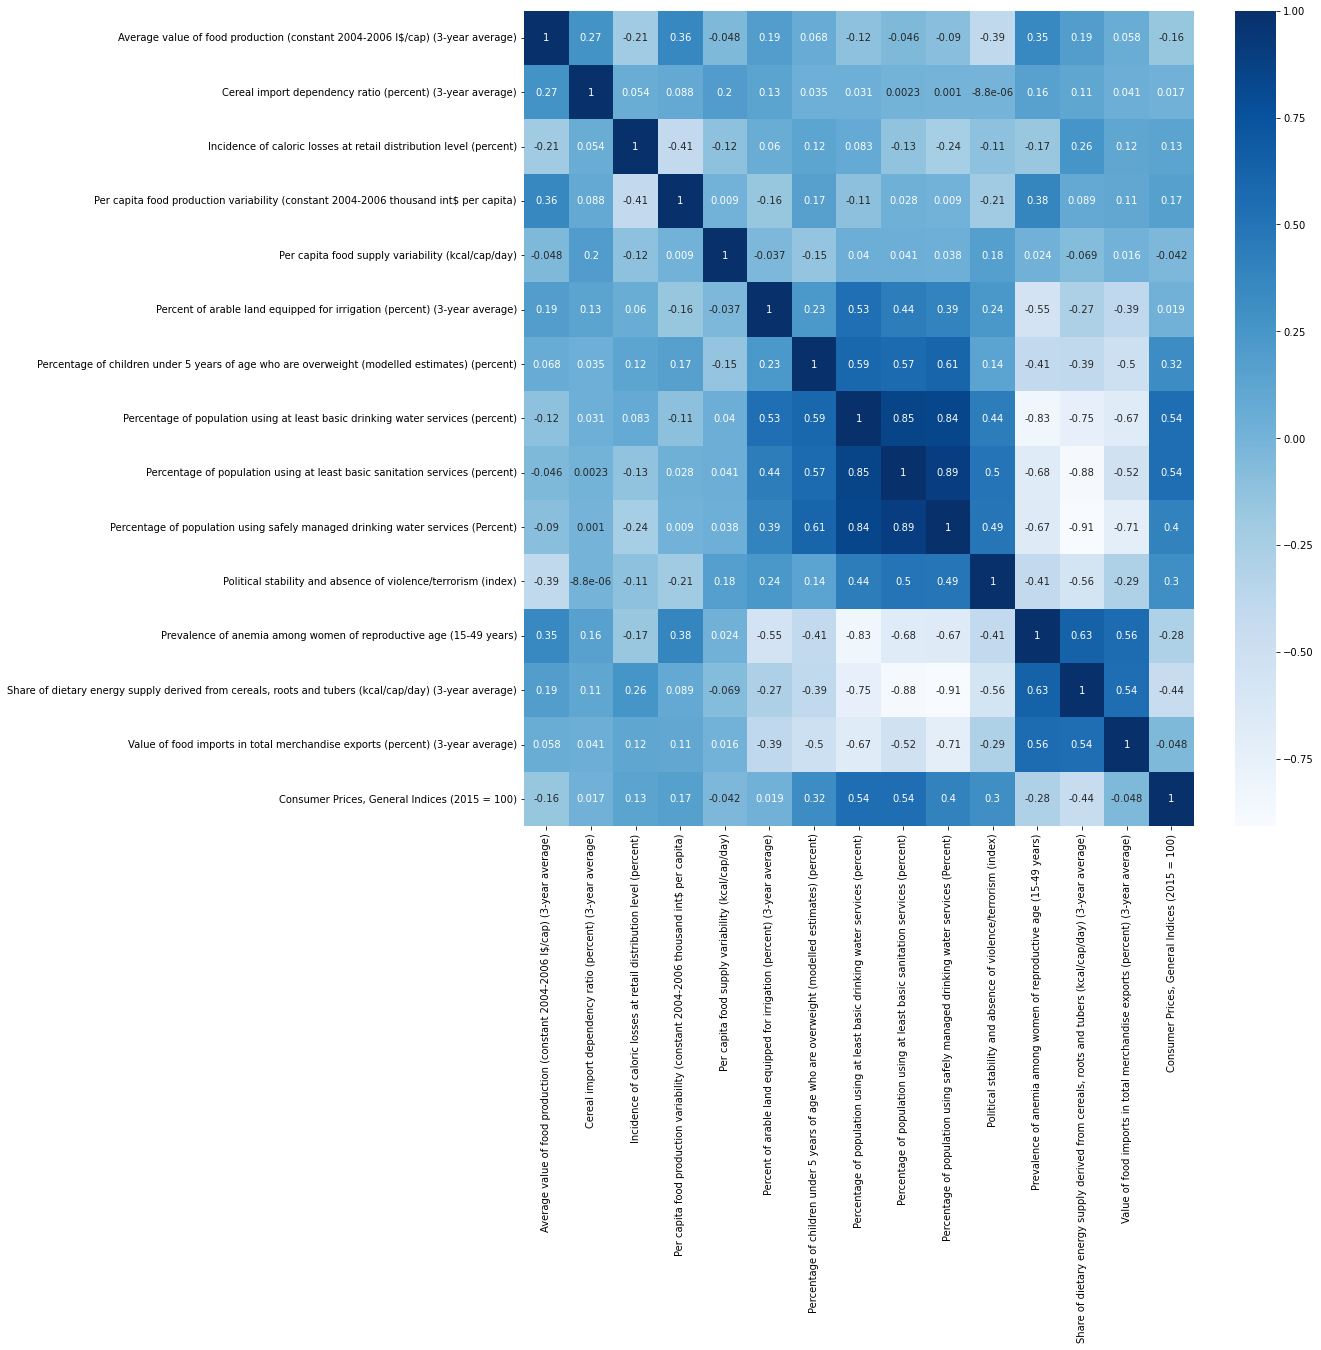

In [293]:
vizdf = X
plt.figure(figsize=(15, 15))
sns.heatmap(X.corr(), cbar=True, annot = True, cmap= 'Blues')

In [236]:
# create a copy df for EDA
data=df.copy()
# rename some vars
data.rename(columns = {'Average dietary energy supply adequacy (percent) (3-year average)':'ADESA',
                       'Average dietary energy requirement (kcal/cap/day)':'ADER',
                       'Gross domestic product per capita, PPP, dissemination (constant 2011 international $)':'GDP_per_capita',
                       'Minimum dietary energy requirement  (kcal/cap/day)':'minDER',
                       'Prevalence of obesity in the adult population (18 years and older)':'obesity',
                       'Prevalence of low birthweight (percent)':'low_birthweight',
                       'Value of food imports in total merchandise exports (percent) (3-year average)':'Food_imports/total_exports',
                       'Consumer Prices, General Indices (2015 = 100)':'CPI',
                       'Number of moderately or severely food insecure people (million) (3-year average)':'FI_amount',
                       'Prevalence of severe food insecurity in the total population (percent) (3-year average)':'severe_FIR',
                       'Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)':'MnS_FIR',
                       'Consumer Prices, Food Indices (2015 = 100)':'FPI',
                       'Percentage of population using safely managed drinking water services (Percent)':'safely_water_service',
                       'Percentage of population using safely managed sanitation services (Percent)':'safely_sanitation_services',
                       'Number of children under 5 years of age who are stunted (modeled estimates) (million)':'Stunted_kids',
                       'Prevalence of undernourishment (percent) (3-year average)':'Undernourishment'}, inplace = True)


In [232]:
data.columns

Index(['Area', 'Year', 'ADER', 'ADESA',
       'Average fat supply (g/cap/day) (3-year average)',
       'Average protein supply (g/cap/day) (3-year average)',
       'Average supply of protein of animal origin (g/cap/day) (3-year average)',
       'Average value of food production (constant 2004-2006 I$/cap) (3-year average)',
       'Cereal import dependency ratio (percent) (3-year average)',
       'Coefficient of variation of habitual caloric consumption distribution (real number)',
       'Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average)',
       'GDP_per_capita',
       'Incidence of caloric losses at retail distribution level (percent)',
       'minDER',
       'Number of children under 5 years affected by wasting (million)',
       'Number of children under 5 years of age who are overweight (modeled estimates) (million)',
       'Stunted_kids',
       'Number of moderately or severely food insecure people (million) (

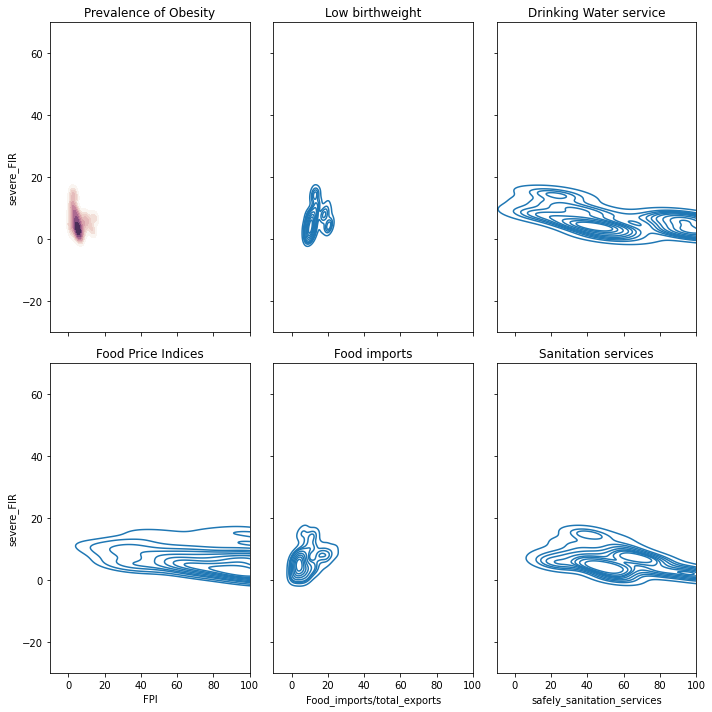

In [187]:
f, axes = plt.subplots(2, 3, figsize=(10, 10), sharex=True, sharey=True)

s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

sns.kdeplot(data['obesity'],data['severe_FIR'],cmap=cmap,shade=True, ax=axes[0,0])
axes[0,0].set(xlim=(-10, 50), ylim=(-30, 70), title = 'Prevalence of Obesity')

cmap = sns.cubehelix_palette(start=0.25, light=1, as_cmap=True)

sns.kdeplot(data['low_birthweight'],data['severe_FIR'], ax=axes[0,1])
axes[0,1].set(xlim=(-10, 50), ylim=(-30, 70), title = 'Low birthweight')

cmap = sns.cubehelix_palette(start=0.33, light=1, as_cmap=True)

sns.kdeplot(data['safely_water_service'],data['severe_FIR'], ax=axes[0,2])
axes[0,2].set(xlim=(-10, 50), ylim=(-30, 70), title = 'Drinking Water service')

cmap = sns.cubehelix_palette(start=0.45, light=1, as_cmap=True)

sns.kdeplot(data['FPI'],data['severe_FIR'], ax=axes[1,0])
axes[1,0].set(xlim=(-10, 50), ylim=(-30, 70), title = 'Food Price Indices')

cmap = sns.cubehelix_palette(start=0.56, light=1, as_cmap=True)

sns.kdeplot(data['Food_imports/total_exports'],data['severe_FIR'], ax=axes[1,1])
axes[1,1].set(xlim=(-10, 50), ylim=(-30, 70), title = 'Food imports')

cmap = sns.cubehelix_palette(start=0.68, light=1, as_cmap=True)

sns.kdeplot(data['safely_sanitation_services'],data['severe_FIR'], ax=axes[1,2])
axes[1,2].set(xlim=(-10, 100), ylim=(-30, 70), title = 'Sanitation services')

f.tight_layout()

#### Q1: What are the factors that contributes to the food insecurity in ASEAN countries?

In [226]:
corr={'Feature':[i for i in rmArea.columns],
      'PCC':[rmArea[i].corr(rmArea['MnS_FIR']) for i in rmArea.columns]}
corr=pd.DataFrame(corr)
corr[abs(corr['PCC'])>0.8].sort_values('PCC').reset_index()

,index,Feature,PCC
0,9,Dietary energy supply used in the estimation o...,-0.822903
1,33,MnS_FIR,1.000000


In [229]:
corr[abs(corr['PCC'])>0.6].sort_values('PCC').reset_index()

,index,Feature,PCC
0,9,Dietary energy supply used in the estimation o...,-0.822903
1,28,safely_water_service,-0.778128
2,26,Percentage of population using at least basic ...,-0.770996
3,27,Percentage of population using at least basic ...,-0.769404
4,1,ADER,-0.721255
5,2,ADESA,-0.720991
6,12,minDER,-0.717572
7,10,GDP_per_capita,-0.705516
8,30,Political stability and absence of violence/te...,-0.652171
9,24,Percentage of children under 5 years of age wh...,-0.620407


The table shows that **Dietary energy supply** is most correlated with FIR, they are strongest negative correlated, and 16 features also show a moderate correlation between the FIR.

#### Q2: What countries that are most vulnerable to food insecurity risk?

the following plots show how do *Severe Food Insecurity Rates/ Moderate&Severe Food Insecurity Rates* and *Prevelance of Undernourishment* change over time of each Asean countries.

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

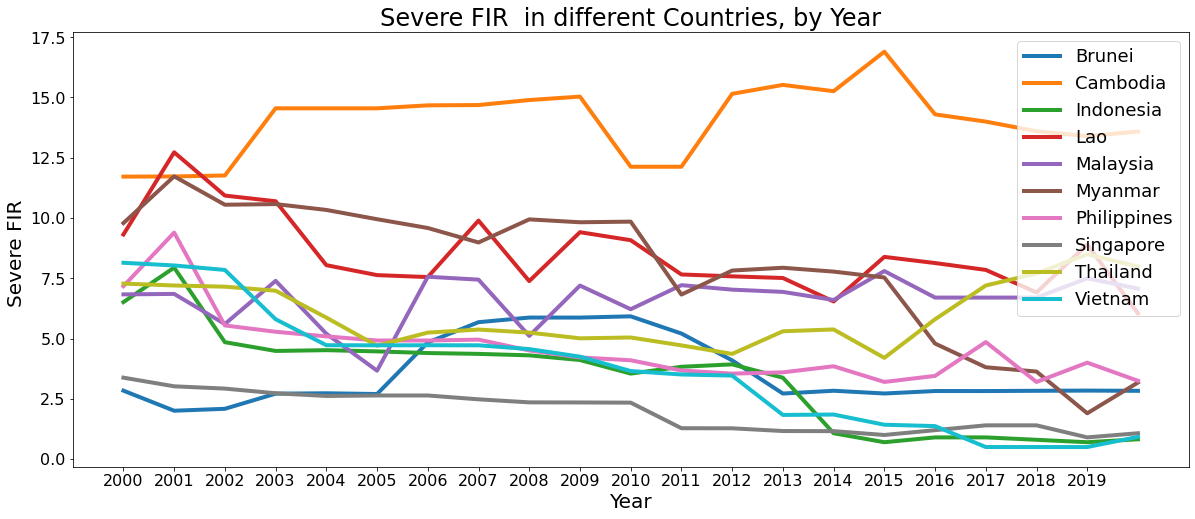

In [206]:
# create df for each country, and group by year
Brunei = data[['severe_FIR','Year']][data['Area']=='Brunei Darussalam'].groupby('Year').mean()
Cambodia = data[['severe_FIR','Year']][data['Area']=='Cambodia'].groupby('Year').mean()
Indonesia = data[['severe_FIR','Year']][data['Area']=='Indonesia'].groupby('Year').mean()
Lao = data[['severe_FIR','Year']][data['Area']=="Lao People's Democratic Republic"].groupby('Year').mean()
Malaysia = data[['severe_FIR','Year']][data['Area']=='Malaysia'].groupby('Year').mean()
Myanmar = data[['severe_FIR','Year']][data['Area']=='Myanmar'].groupby('Year').mean()
Philippines = data[['severe_FIR','Year']][data['Area']=='Philippines'].groupby('Year').mean()
Singapore = data[['severe_FIR','Year']][data['Area']=='Singapore'].groupby('Year').mean()
Thailand = data[['severe_FIR','Year']][data['Area']=='Thailand'].groupby('Year').mean()
Vietnam = data[['severe_FIR','Year']][data['Area']=='Viet Nam'].groupby('Year').mean()
# plot each df in a lineplot
plt.figure(figsize=(20, 8));
ax =sns.lineplot(x= Brunei.index, y= Brunei['severe_FIR'], label='Brunei',linewidth = 4);
ax =sns.lineplot(x= Cambodia.index, y= Cambodia['severe_FIR'], label='Cambodia',linewidth = 4);
ax =sns.lineplot(x= Indonesia.index, y= Indonesia['severe_FIR'], label="Indonesia",linewidth = 4);
ax =sns.lineplot(x= Lao.index, y= Lao['severe_FIR'], label='Lao',linewidth = 4);
ax =sns.lineplot(x= Malaysia.index, y= Malaysia['severe_FIR'], label='Malaysia',linewidth = 4);
ax =sns.lineplot(x= Myanmar.index, y= Myanmar['severe_FIR'], label='Myanmar',linewidth = 4);
ax =sns.lineplot(x= Philippines.index, y= Philippines['severe_FIR'], label='Philippines',linewidth = 4);
ax =sns.lineplot(x= Singapore.index, y= Singapore['severe_FIR'], label='Singapore',linewidth = 4);
ax =sns.lineplot(x= Thailand.index, y= Thailand['severe_FIR'], label='Thailand',linewidth = 4);
ax =sns.lineplot(x= Vietnam.index, y= Vietnam['severe_FIR'], label='Vietnam',linewidth = 4);
ax.set_title("Severe FIR  in different Countries, by Year", fontsize=24);
ax.set_ylabel('Severe FIR ', fontsize=20);
ax.set_xlabel('Year', fontsize=20);
ax.legend(prop=dict(size=18));
plt.xticks(range(2000,2020), fontsize=16);
plt.yticks(fontsize=16)

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

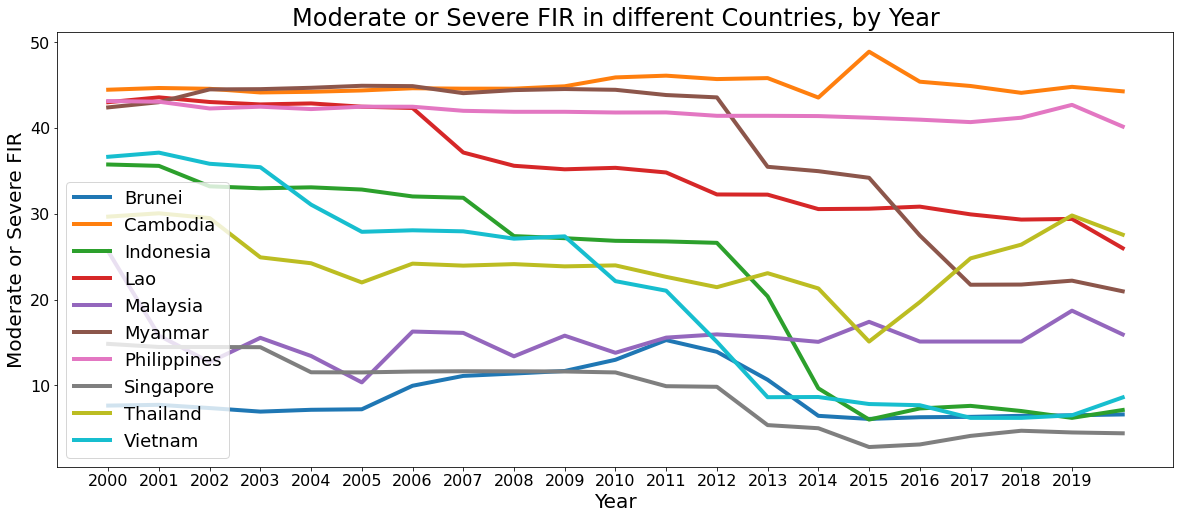

In [207]:
Brunei = data[['MnS_FIR','Year']][data['Area']=='Brunei Darussalam'].groupby('Year').mean()
Cambodia = data[['MnS_FIR','Year']][data['Area']=='Cambodia'].groupby('Year').mean()
Indonesia = data[['MnS_FIR','Year']][data['Area']=='Indonesia'].groupby('Year').mean()
Lao = data[['MnS_FIR','Year']][data['Area']=="Lao People's Democratic Republic"].groupby('Year').mean()
Malaysia = data[['MnS_FIR','Year']][data['Area']=='Malaysia'].groupby('Year').mean()
Myanmar = data[['MnS_FIR','Year']][data['Area']=='Myanmar'].groupby('Year').mean()
Philippines = data[['MnS_FIR','Year']][data['Area']=='Philippines'].groupby('Year').mean()
Singapore = data[['MnS_FIR','Year']][data['Area']=='Singapore'].groupby('Year').mean()
Thailand = data[['MnS_FIR','Year']][data['Area']=='Thailand'].groupby('Year').mean()
Vietnam = data[['MnS_FIR','Year']][data['Area']=='Viet Nam'].groupby('Year').mean()

plt.figure(figsize=(20, 8));
ax =sns.lineplot(x= Brunei.index, y= Brunei['MnS_FIR'], label='Brunei',linewidth = 4);
ax =sns.lineplot(x= Cambodia.index, y= Cambodia['MnS_FIR'], label='Cambodia',linewidth = 4);
ax =sns.lineplot(x= Indonesia.index, y= Indonesia['MnS_FIR'], label="Indonesia",linewidth = 4);
ax =sns.lineplot(x= Lao.index, y= Lao['MnS_FIR'], label='Lao',linewidth = 4);
ax =sns.lineplot(x= Malaysia.index, y= Malaysia['MnS_FIR'], label='Malaysia',linewidth = 4);
ax =sns.lineplot(x= Myanmar.index, y= Myanmar['MnS_FIR'], label='Myanmar',linewidth = 4);
ax =sns.lineplot(x= Philippines.index, y= Philippines['MnS_FIR'], label='Philippines',linewidth = 4);
ax =sns.lineplot(x= Singapore.index, y= Singapore['MnS_FIR'], label='Singapore',linewidth = 4);
ax =sns.lineplot(x= Thailand.index, y= Thailand['MnS_FIR'], label='Thailand',linewidth = 4);
ax =sns.lineplot(x= Vietnam.index, y= Vietnam['MnS_FIR'], label='Vietnam',linewidth = 4);
ax.set_title("Moderate or Severe FIR in different Countries, by Year", fontsize=24);
ax.set_ylabel('Moderate or Severe FIR', fontsize=20);
ax.set_xlabel('Year', fontsize=20);
ax.legend(prop=dict(size=18));
plt.xticks(range(2000,2020), fontsize=16);
plt.yticks(fontsize=16)

<AxesSubplot:title={'center':'Food Insecurity Rates 2020 in Asean Countries'}, ylabel='Area'>

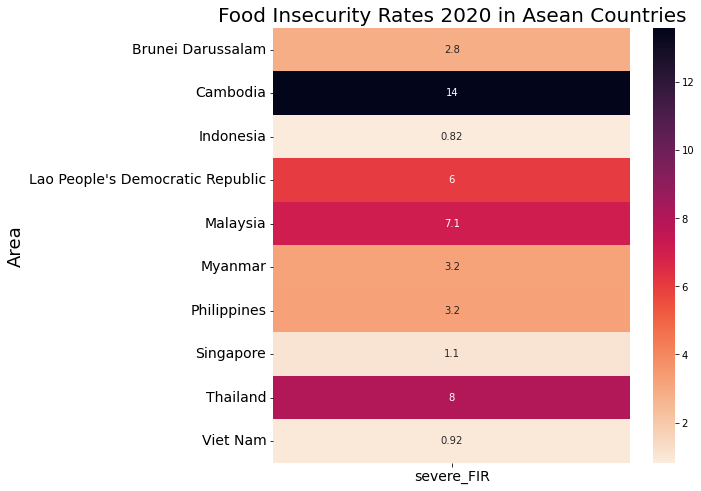

In [208]:
# Create dataframe of 5 random cities
a = data[['Area','severe_FIR']][data['Year']==2020]
a = a.set_index('Area')[['severe_FIR']]
# make heatmap with most variant features
plt.figure(figsize=(8, 8));
plt.title('Food Insecurity Rates 2020 in Asean Countries', fontsize=20);
ax.set_ylim(-20, 20);
plt.xlabel('severe_FIR', fontdict={'fontsize':18});
plt.ylabel('Country', fontdict={'fontsize':18});
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
sns.heatmap(a, annot=True, cmap='rocket_r')

As shown above,
- **Cambodia** has the highest severe FIR over time. 
- **Sinapore** always has low FIR. 
- The FIR of **VietNam** and **Indonesia** go down obviously in these years.

#### Q3: What are the relationship between food insecurity prevalence and other factors such as population size and food prices?

In [265]:
# pip install plotly
from plotly import express as px
fig = px.scatter(data, x="FPI", y="FI_amount", facet_col="Area", facet_col_wrap=5)
fig.show()
data.groupby('Area')[['FPI','FI_amount']].corr().unstack().iloc[:,1]

Area
Brunei Darussalam                   0.875616
Cambodia                           -0.840529
Indonesia                           0.002204
Lao People's Democratic Republic   -0.709464
Malaysia                           -0.662469
Myanmar                            -0.821074
Philippines                         0.312165
Singapore                          -0.859986
Thailand                            0.796697
Viet Nam                           -0.266782
Name: (FPI, FI_amount), dtype: float64

- In Brunei and Thailand, food price has a positive correlation between food insecurity population.
- In Cambodia, Lao, Malaysia, Myanmar and Singapore, food price has a negative correlation between food insecurity population.

In [268]:
# pip install plotly
from plotly import express as px
fig = px.scatter(data, x="Population_total", y="FI_amount", facet_col="Area", facet_col_wrap=5)
fig.show()
data.groupby('Area')[['Population_total','severe_FIR']].corr().unstack().iloc[:,1]

Area
Brunei Darussalam                  -0.018749
Cambodia                            0.315097
Indonesia                          -0.926095
Lao People's Democratic Republic   -0.632213
Malaysia                            0.324635
Myanmar                            -0.901304
Philippines                        -0.767080
Singapore                          -0.947026
Thailand                            0.011207
Viet Nam                           -0.962148
Name: (Population_total, severe_FIR), dtype: float64

In most Asean countries, population is negative correlated to food insecurity.

## Modelling

## Simple Linear Regression

In [294]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model_df = pd.merge(X, y, left_index=True, right_index=True)

In [295]:
x = np.array(model_df['Prevalence of anemia among women of reproductive age (15-49 years)']) #dependent variable with the highest correlation with independence variable
y = np.array(model_df['Prevalence of severe food insecurity in the total population (percent) (3-year average)']) #independence variable
x = x.reshape(-1, 1)

In [296]:
# Splitting the variables as training and testing
from sklearn.model_selection import train_test_split
x_train_slr, x_test_slr, y_train_slr, y_test_slr = train_test_split(x, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 42)

In [297]:
model = LinearRegression().fit(x_train_slr, y_train_slr)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.6569630646835176


In [298]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: -1.094674210565679
slope: [0.25480658]


In [300]:
# prediction of y value using trained data
y_pred_slr = model.predict(x_train_slr)
print(f"predicted response:\n{y_pred_slr}")

# Creating residuals from the y_train data and predicted y_data
res = (y_train_slr - y_pred_slr)

predicted response:
[ 4.96972231  8.51153373  3.61924746  4.15434127 10.70287029  2.67646312
 10.72835094 11.03411884  7.39038479  8.99566622  6.65144572  2.29425326
  5.86154533  8.99566622  4.2562639   8.20576584 10.74397908  3.36444088
  8.38413044  9.63268267 11.44180936  2.77838575  4.46010916  9.40335675
  3.05867299  8.28220781  6.6004844   5.0971256   9.4288374   7.05913624
  7.747114    2.60002115 10.7538316   9.09758885  6.85529098 12.35911304
  3.21155693  9.63268267 10.65190897  2.67646312  3.49184417  2.15818655
  2.85482773 11.21248344  4.28174456  3.23703759  2.16684997  2.90578904
 10.65190897  9.22499214  1.88656274  9.19951149  4.23078324  9.09758885
  2.70194378  6.65380268  1.98848537  1.86108208  4.40914784  3.26251825
  5.86154533  4.76587705  8.46057241  1.98848537  9.53076003  6.98269427
  3.44088285 10.90671555  9.53076003 12.10430646  1.83560142  1.83560142
  8.79182096 10.88123489  4.4346285   6.4221198   6.65144572  1.91204339
  7.16105887  2.03944668  2.982

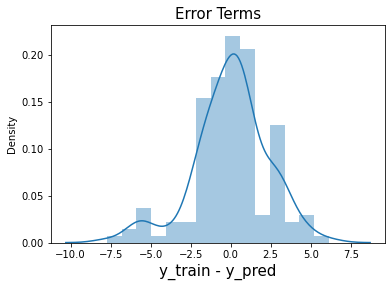

In [301]:
# Plotting the histogram using the residual values (error)
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train_slr - y_pred_slr', fontsize = 15)
plt.show()

In [302]:
# Predicting the y values corresponding to X_test
y_test_pred_slr = model.predict(x_test_slr)

# Printing the first 15 predicted values
y_test_pred_slr


array([10.77931226,  4.28174456,  7.84903663,  3.28799891,  6.65144572,
        1.83560142,  6.77884901,  4.63847376,  2.72742444,  3.72117009,
        3.67020877,  5.02068363,  3.95049601,  5.27549021,  2.7529051 ,
        8.18028518,  2.14136931,  3.03319233,  4.2562639 ,  6.72788769,
        8.15480452,  5.83606467,  2.03944668, 10.0913345 , 10.32066042,
        2.4471372 , 11.64565462,  6.96573143,  2.82934707,  4.33270587,
        4.81683837,  8.61345636,  6.88077164,  8.94470491,  6.90339482,
        4.46010916,  4.53655113,  6.6004844 ,  8.97018557,  1.83560142,
        3.51732483,  1.93752405,  1.91204339,  6.57500375,  3.23703759,
        8.7663403 ,  1.81012076,  7.61971071,  6.77884901, 10.83027358,
       11.87498054,  4.68943508,  8.94470491, 10.88123489,  3.16059562,
        3.87405403,  2.95675036,  9.14855017,  9.32691477,  2.85482773,
        2.49121874,  5.9379873 ,  6.6004844 ])

In [303]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test_slr, y_test_pred_slr)
r_squared

0.7308478237053593

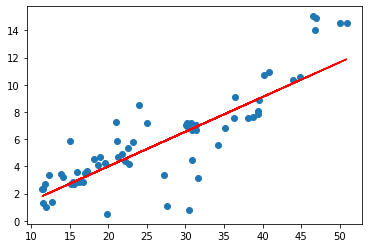

In [304]:
# Visualize the line on the test set
plt.scatter(x_test_slr, y_test_slr)
plt.plot(x_test_slr, y_test_pred_slr, 'r')
plt.show()

## Multiple Linear Regression

In [305]:
X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(X,y, test_size = 0.3, random_state=42)

In [306]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_mlr, y_train_mlr)

LinearRegression()

In [310]:
y_pred_mlr = lin_reg.predict(X_test_mlr)

In [311]:
lin_reg.coef_

array([ 6.20120963e-03,  4.71935072e-03, -3.31368237e+00,  2.17557626e-01,
       -1.10521227e-02, -7.47383189e-02, -1.98490893e-01, -3.89924309e-02,
       -2.39019620e-02, -4.25960626e-02,  9.75438690e-01,  2.16681522e-02,
        2.61297358e-02, -1.96456393e-01, -7.81314104e-04])

In [312]:
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test_mlr, y_pred_mlr)
errors

1.2008678507796673

In [313]:
from sklearn.metrics import mean_squared_error
errors_root = mean_squared_error(y_test_mlr, y_pred_mlr, squared = False)
errors_root

1.0958411612910273

In [314]:
from sklearn.metrics import r2_score
rsqr = r2_score(y_test_mlr,y_pred_mlr)
rsqr

0.9078922192685885

In [315]:
test_residuals = y_test_mlr - y_pred_mlr

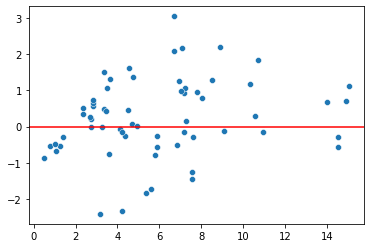

In [316]:
#test_residuals 
sns.scatterplot(x=y_test_mlr, y=test_residuals)
plt.axhline(y=0, color = 'red')

## Random Forest Regression

In [319]:
#import random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X,y, test_size = 0.3, random_state=42)

In [320]:
regressor = RandomForestRegressor()

In [321]:
regressor.fit(X_train_rf, y_train_rf)
y_pred_rf = regressor.predict(X_test_rf)

In [322]:
r2_score(y_test_rf, y_pred_rf)

0.9492128072674932

In [323]:
mean_squared_error(y_test_rf, y_pred_rf)

0.6621450055523828

In [324]:
mean_squared_error(y_test_rf, y_pred_rf, squared=False)

0.8137229292286059

In [325]:
#plotting learning curves
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

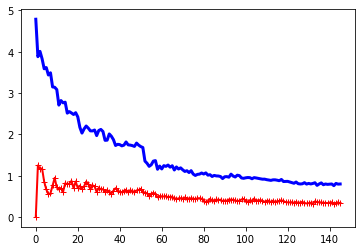

In [326]:
#plotting rf graph
plot_learning_curves(regressor, X, y)

## Evaluation

In [328]:
r2={
    'model':['Simple linear regression','Multiple linear regression','Random forest regression'],
    'r2_score':[r2_score(y_test_slr, y_test_pred_slr),r2_score(y_test_mlr,y_pred_mlr),r2_score(y_test_rf, y_pred_rf)]
}
r2=pd.DataFrame(r2)
r2

,model,r2_score
0,Simple linear regression,0.730848
1,Multiple linear regression,0.907892
2,Random forest regression,0.949213


Conclusion: We can use random forest regression to predict severe food insecurity rate which has the best performance.